## **Task 1: Exploratory Data Analysis (EDA):**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
wine = pd.read_csv("/content/wine.csv")
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [ ]:
wine.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [ ]:
# Considering only numerical data
wine = wine.iloc[:,1:]

In [ ]:
wine.head(3)

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185

In [ ]:
wine.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
wine.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [ ]:
wine.duplicated().sum()

0

In [ ]:
wine.isna()

Alcohol  Malic    Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      False  False  False       False      False    False       False   
1      False  False  False       False      False    False       False   
2      False  False  False       False      False    False       False   
3      False  False  False       False      False    False       False   
4      False  False  False       False      False    False       False   
..       ...    ...    ...         ...        ...      ...         ...   
173    False  False  False       False      False    False       False   
174    False  False  False       False      False    False       False   
175    False  False  False       False      False    False       False   
176    False  False  False       False      False    False       False   
177    False  False  False       False      False    False       False   

     Nonflavanoids  Proanthocyanins  Color    Hue  Dilution  Proline  
0            False            False  False  False     False    False  
1            False            False  False  False     False    False  
2            False            False  False  False     False    False  
3            False            False  False  False     False    False  
4            False            False  False  False     False    False  
..             ...              ...    ...    ...       ...      ...  
173          False            False  False  False     False    False  
174          False            False  False  False     False    False  
175          False            False  False  False     False    False  
176          False            False  False  False     False    False  
177          False            False  False  False     False    False  

[178 rows x 13 columns]

In [ ]:
wine.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

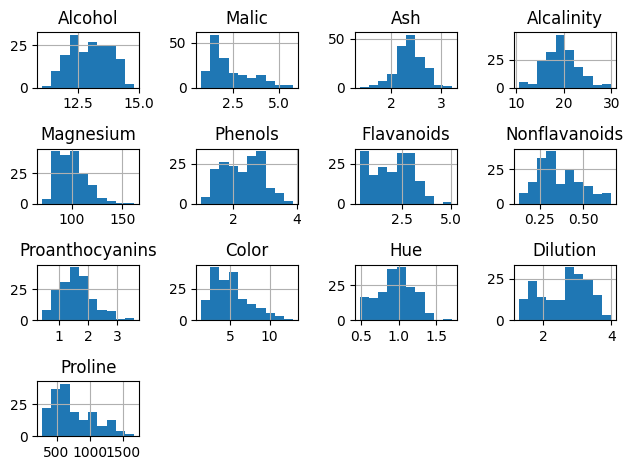

In [ ]:
wine.hist()
plt.tight_layout()

<Axes: >

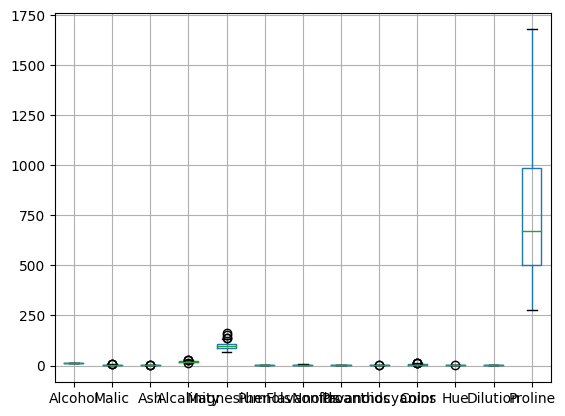

In [ ]:
wine.boxplot()

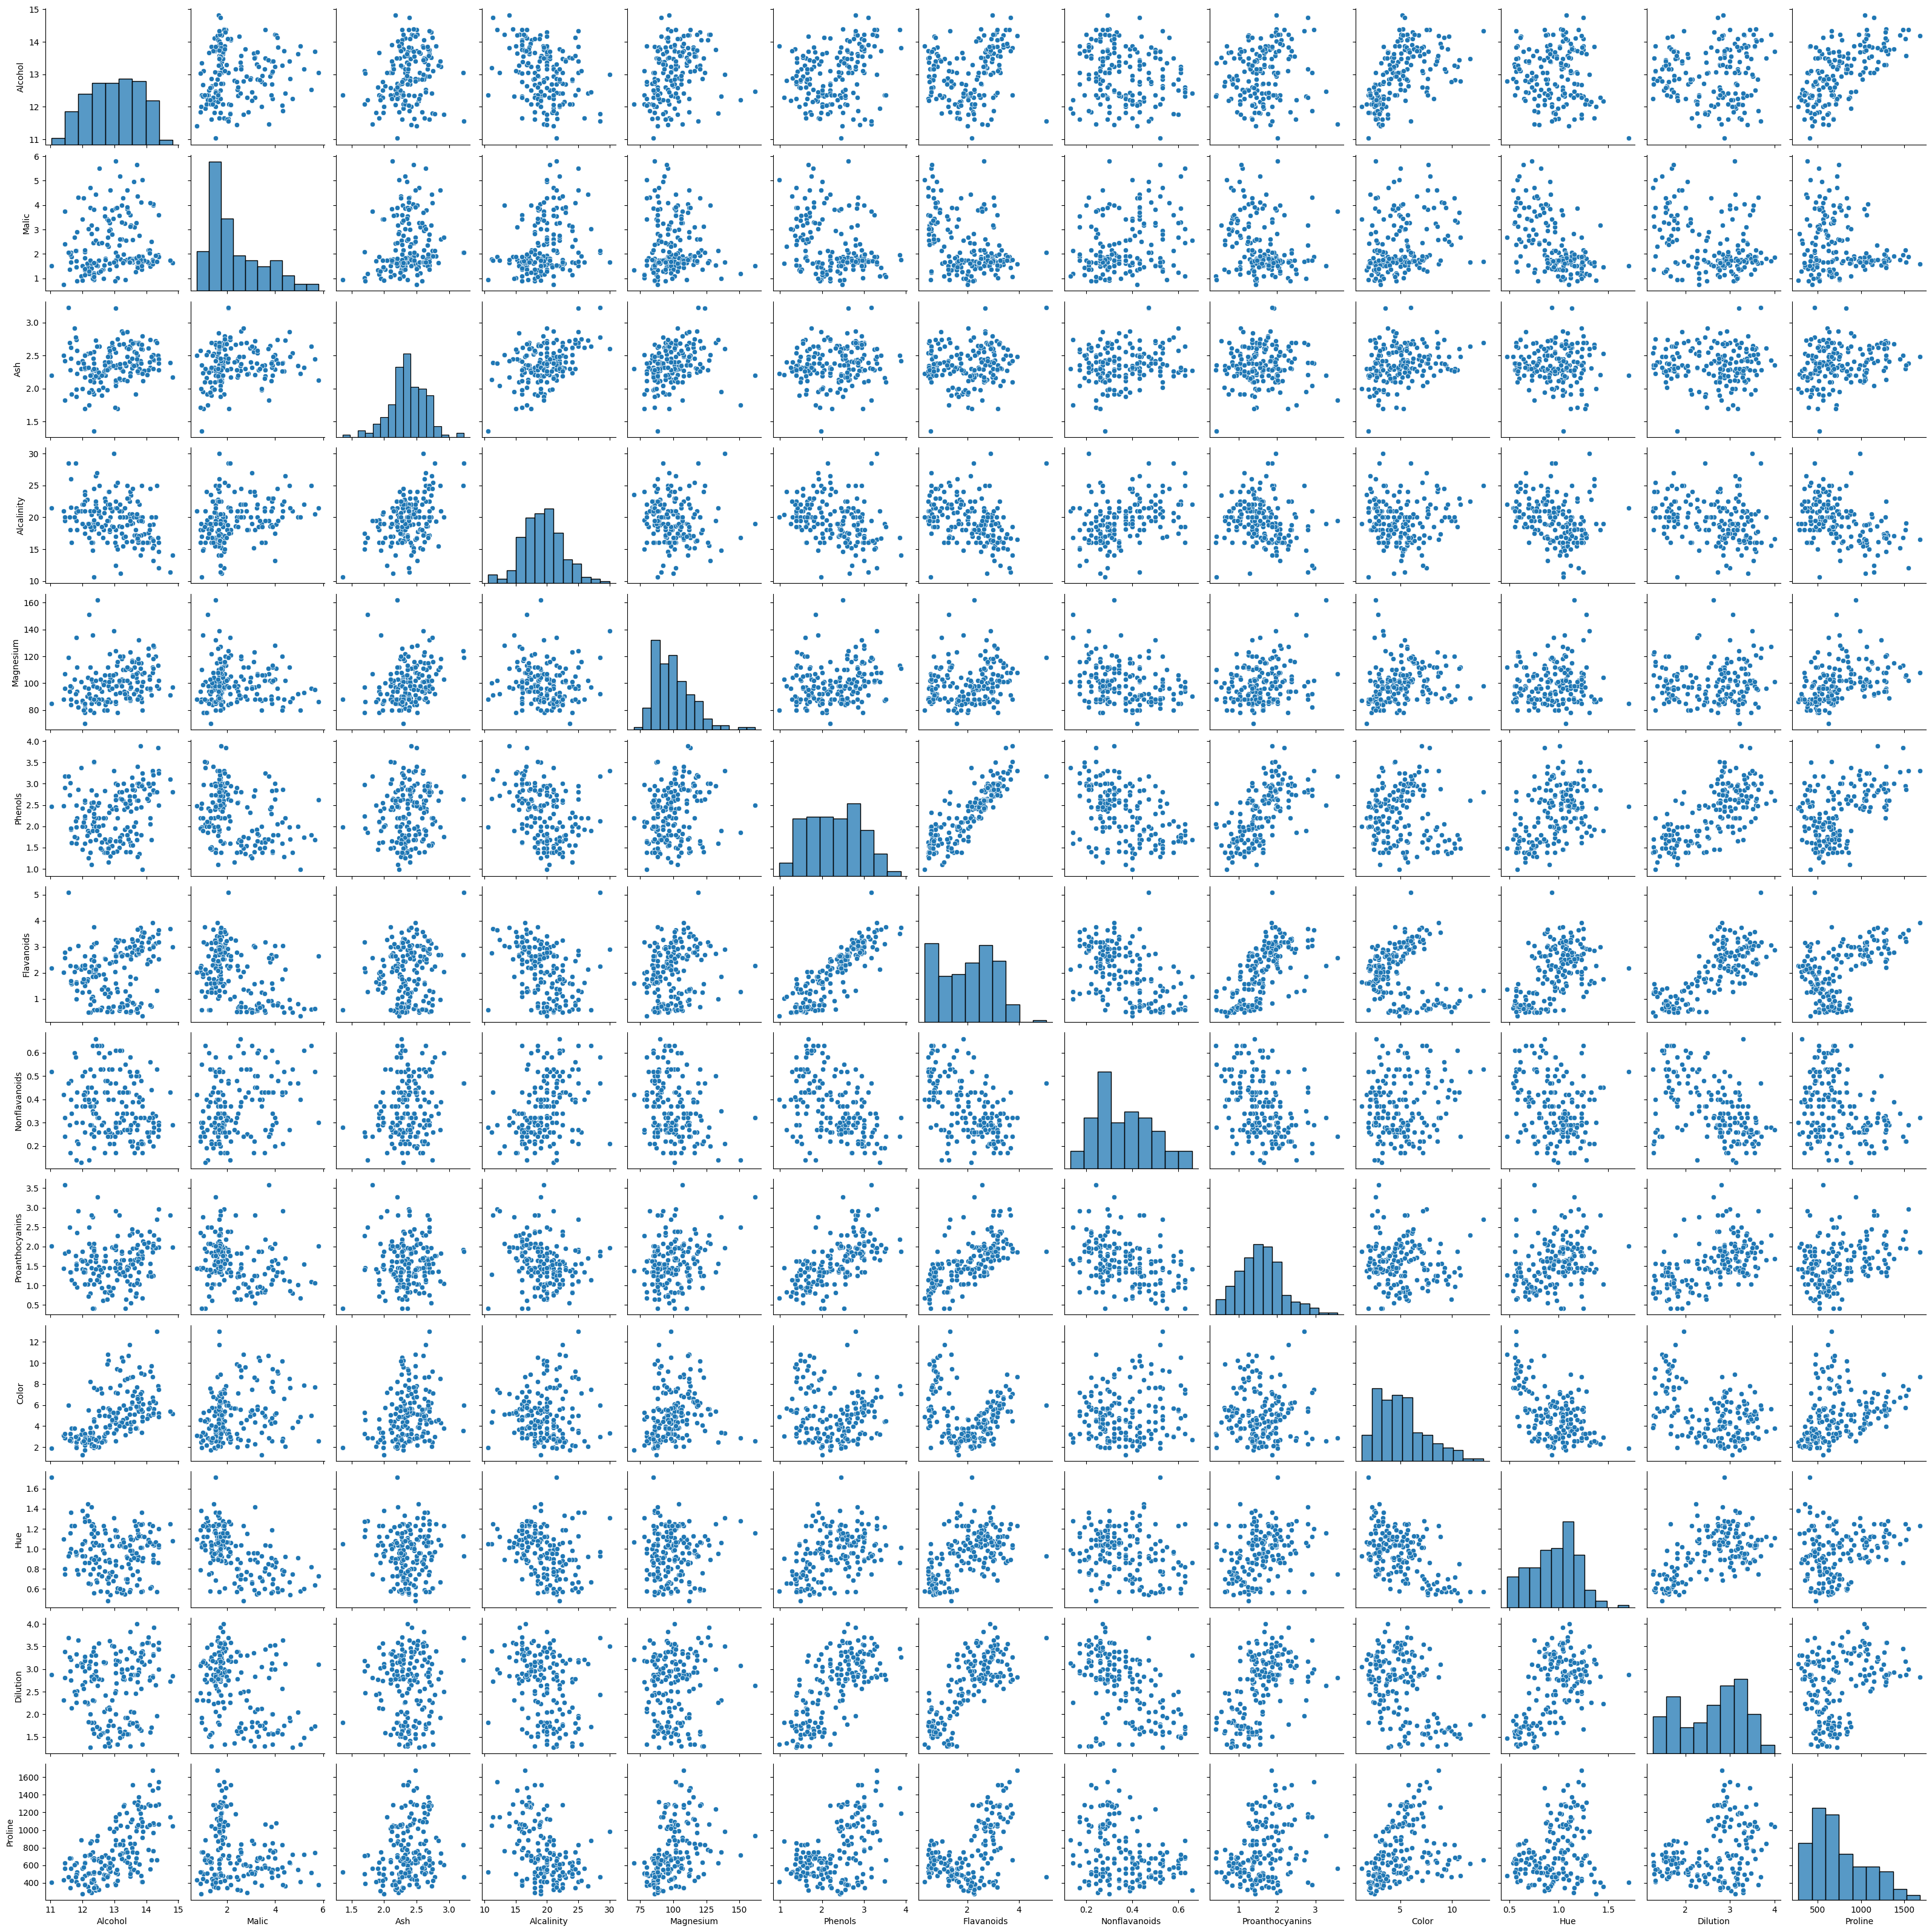

In [ ]:
sns.pairplot(wine)

<Axes: >

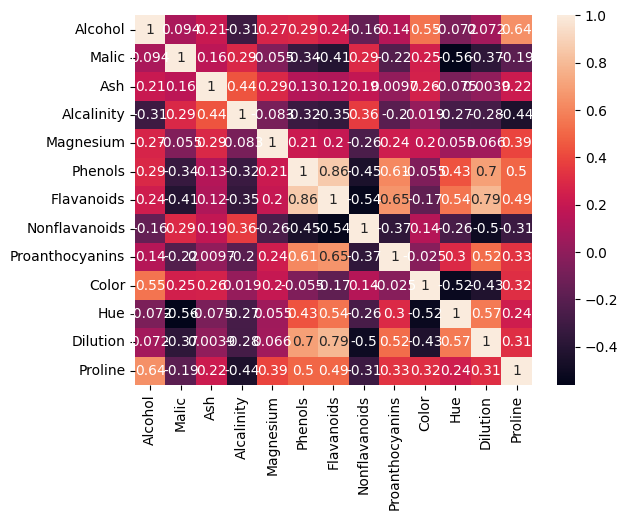

In [ ]:
sns.heatmap(wine.corr(numeric_only=True),annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit_transform(wine)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
pd.DataFrame(sc.fit_transform(wine))

0         1         2         3         4         5         6   \
0    1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1    0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2    0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3    1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4    0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.876275  2.974543  0.305159  0.301803 -0.332922 -0.985614 -1.424900   
174  0.493343  1.412609  0.414820  1.052516  0.158572 -0.793334 -1.284344   
175  0.332758  1.744744 -0.389355  0.151661  1.422412 -1.129824 -1.344582   
176  0.209232  0.227694  0.012732  0.151661  1.422412 -1.033684 -1.354622   
177  1.395086  1.583165  1.365208  1.502943 -0.262708 -0.392751 -1.274305   

           7         8         9         10        11        12  
0   -0.659563  1.224884  0.251717  0.362177  1.847920  1.013009  
1   -0.820719 -0.544721 -0.293321  0.406051  1.113449  0.965242  
2   -0.498407  2.135968  0.269020  0.318304  0.788587  1.395148  
3   -0.981875  1.032155  1.186068 -0.427544  1.184071  2.334574  
4    0.226796  0.401404 -0.319276  0.362177  0.449601 -0.037874  
..        ...       ...       ...       ...       ...       ...  
173  1.274310 -0.930179  1.142811 -1.392758 -1.231206 -0.021952  
174  0.549108 -0.316950  0.969783 -1.129518 -1.485445  0.009893  
175  0.549108 -0.422075  2.224236 -1.612125 -1.485445  0.280575  
176  1.354888 -0.229346  1.834923 -1.568252 -1.400699  0.296498  
177  1.596623 -0.422075  1.791666 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]

In [36]:
wine.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [38]:
scaled_data = pd.DataFrame(sc.fit_transform(wine),columns=wine.columns)
scaled_data

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1    0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2    0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3    1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4    0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...         ...        ...       ...   
173  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  
0    1.013009  
1    0.965242  
2    1.395148  
3    2.334574  
4   -0.037874  
..        ...  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160  

[178 rows x 13 columns]

In [39]:
scaled_data.describe()

Alcohol         Malic           Ash    Alcalinity     Magnesium  \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -8.382808e-16 -1.197544e-16 -8.370333e-16 -3.991813e-17 -3.991813e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00 -2.671018e+00 -2.088255e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01 -6.891372e-01 -8.244151e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02  1.518295e-03 -1.222817e-01   
75%    8.361286e-01  6.697929e-01  6.981085e-01  6.020883e-01  5.096384e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00  3.154511e+00  4.371372e+00   

          Phenols    Flavanoids  Nonflavanoids  Proanthocyanins         Color  \
count  178.000000  1.780000e+02   1.780000e+02     1.780000e+02  1.780000e+02   
mean     0.000000 -3.991813e-16   3.592632e-16    -1.197544e-16  2.494883e-17   
std      1.002821  1.002821e+00   1.002821e+00     1.002821e+00  1.002821e+00   
min     -2.107246 -1.695971e+00  -1.868234e+00    -2.069034e+00 -1.634288e+00   
25%     -0.885468 -8.275393e-01  -7.401412e-01    -5.972835e-01 -7.951025e-01   
50%      0.095960  1.061497e-01  -1.760948e-01    -6.289785e-02 -1.592246e-01   
75%      0.808997  8.490851e-01   6.095413e-01     6.291754e-01  4.939560e-01   
max      2.539515  3.062832e+00   2.402403e+00     3.485073e+00  3.435432e+00   

                Hue      Dilution       Proline  
count  1.780000e+02  1.780000e+02  1.780000e+02  
mean   1.995907e-16  3.193450e-16 -1.596725e-16  
std    1.002821e+00  1.002821e+00  1.002821e+00  
min   -2.094732e+00 -1.895054e+00 -1.493188e+00  
25%   -7.675624e-01 -9.522483e-01 -7.846378e-01  
50%    3.312687e-02  2.377348e-01 -2.337204e-01  
75%    7.131644e-01  7.885875e-01  7.582494e-01  
max    3.301694e+00  1.960915e+00  2.971473e+00

## **Task 2: Dimensionality Reduction with PCA:**

In [ ]:
# Standardize the numerical data
std = StandardScaler()
wine_normal=std.fit_transform(wine)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
pca=PCA()
pca_components=pca.fit_transform(wine_normal)

In [ ]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [ ]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [ ]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

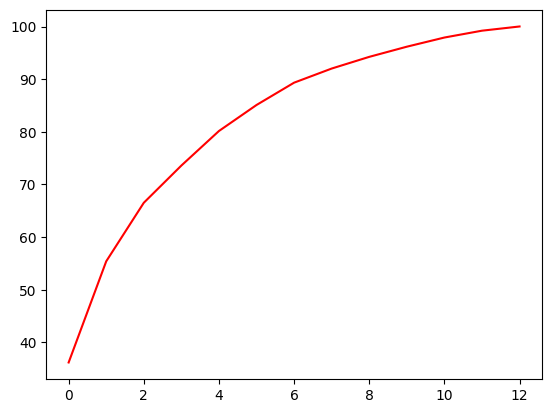

In [ ]:
plt.plot(var1, color="red")

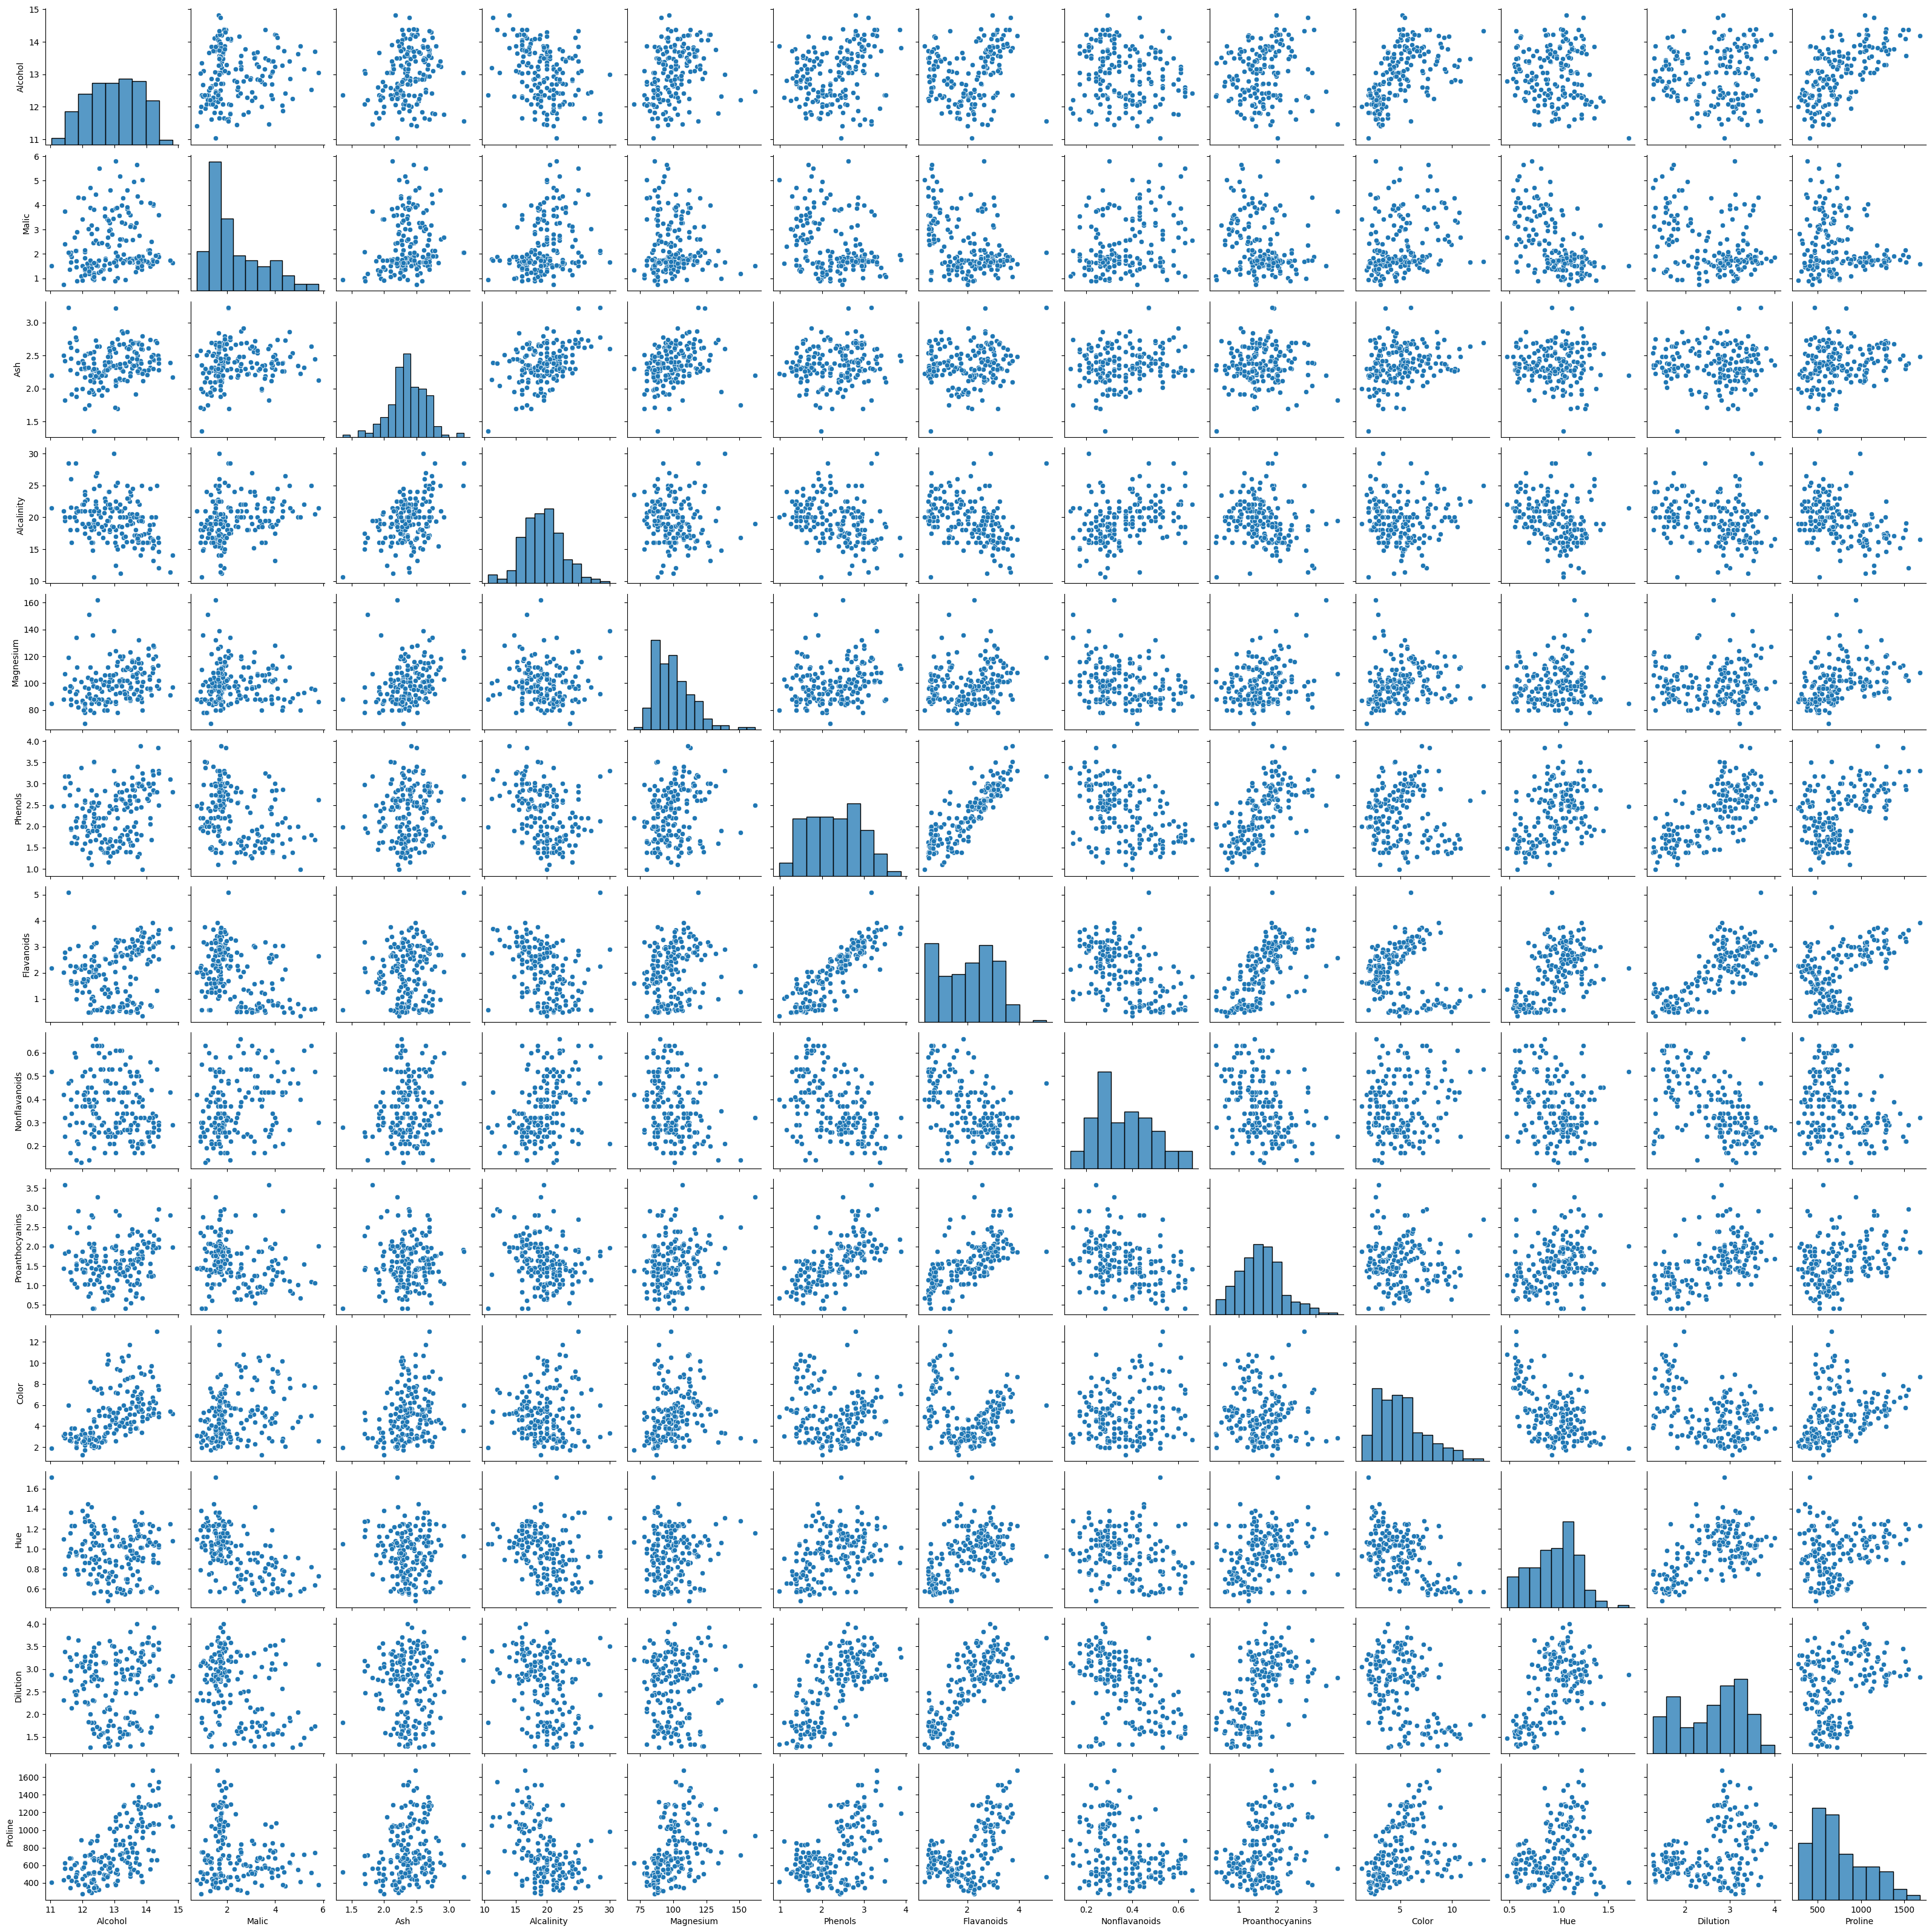

In [ ]:
import seaborn as sns
sns.pairplot(wine)

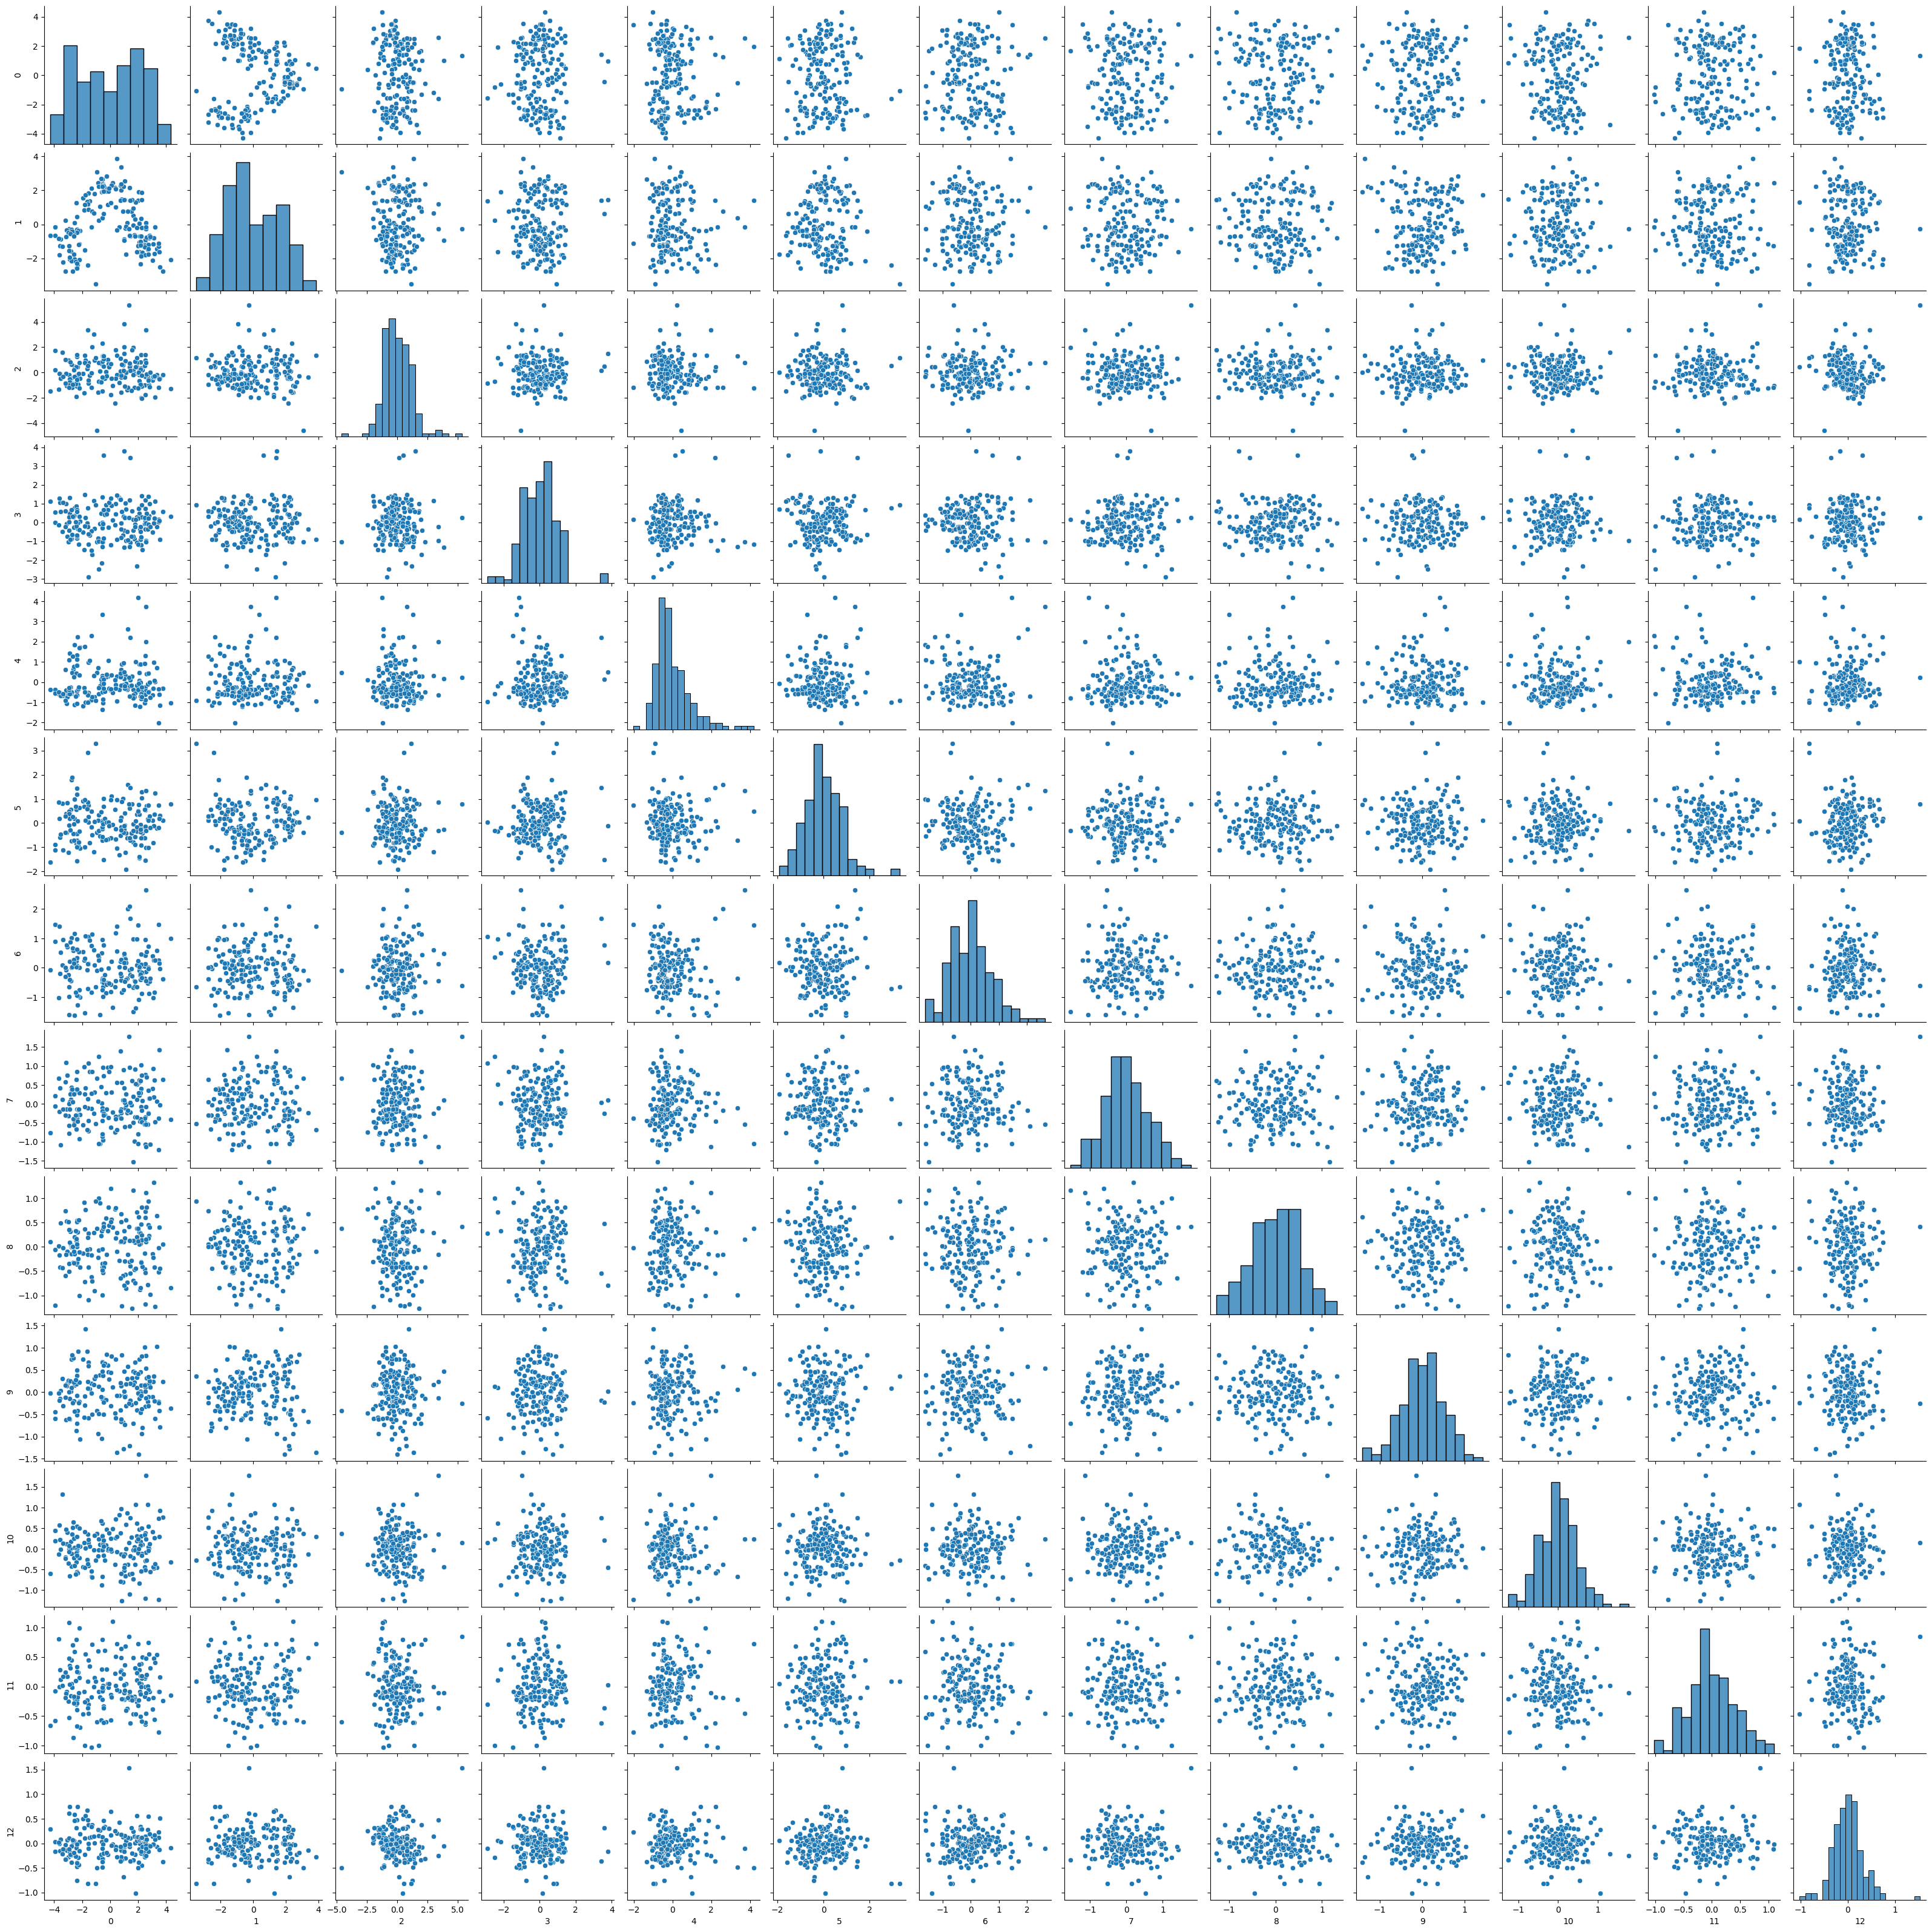

In [ ]:
sns.pairplot(pd.DataFrame(pca_components))

## **Task 3: Clustering with Original Data:**

In [40]:
from sklearn.cluster import KMeans

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(wine.iloc[:,1:])
scaled_wine

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(scaled_wine)
    wcss.append(kmeans.inertia_)

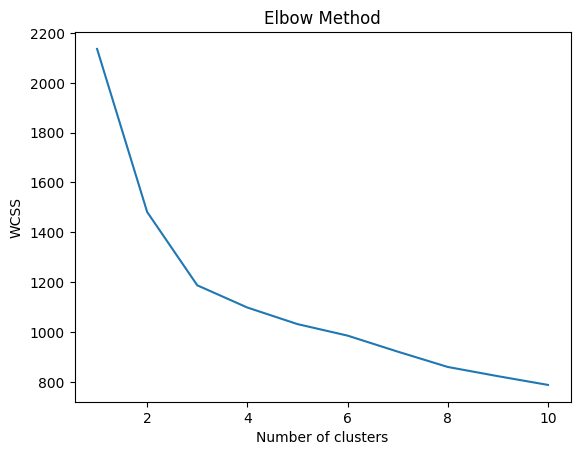

In [46]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
wcss

[2135.9999999999986,
 1481.5532842310736,
 1187.422910049189,
 1098.2278844714017,
 1031.7841120982528,
 985.534817497819,
 921.3813330721512,
 859.7649999581249,
 822.8376691112928,
 787.7259061852261]

In [48]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_wine)

In [49]:
predict

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 3, 0, 2, 0, 2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 3, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [50]:
clusters_new = KMeans(n_clusters=3, random_state=0)
new_predict=clusters_new.fit_predict(scaled_wine)

In [51]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [52]:
new_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [53]:
wine['clusterid_new'] = new_predict

In [54]:
wine

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     clusterid_new  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
173              2  
174              2  
175              2  
176              2  
177              2  

[178 rows x 14 columns]

In [55]:
wine.groupby('clusterid_new').mean('numeric_only')

Alcohol     Malic       Ash  Alcalinity   Magnesium  \
clusterid_new                                                          
0              12.304407  1.950508  2.227627   20.138983   90.457627   
1              13.481714  1.955857  2.435857   17.591429  108.071429   
2              13.151633  3.344490  2.434694   21.438776   99.020408   

                Phenols  Flavanoids  Nonflavanoids  Proanthocyanins     Color  \
clusterid_new                                                                   
0              2.167119    1.965254       0.375085         1.494576  2.966780   
1              2.834857    2.945143       0.288429         1.971571  5.221143   
2              1.678163    0.797959       0.450816         1.163061  7.343265   

                    Hue  Dilution      Proline  
clusterid_new                                   
0              1.062475  2.760847   481.762712  
1              1.059000  3.131000  1053.900000  
2              0.685918  1.690204   627.551020

In [56]:
wine[wine['clusterid_new']==0]

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
59     12.37   0.94  1.36        10.6         88     1.98        0.57   
60     12.33   1.10  2.28        16.0        101     2.05        1.09   
61     12.64   1.36  2.02        16.8        100     2.02        1.41   
62     13.67   1.25  1.92        18.0         94     2.10        1.79   
63     12.37   1.13  2.16        19.0         87     3.50        3.10   
64     12.17   1.45  2.53        19.0        104     1.89        1.75   
66     13.11   1.01  1.70        15.0         78     2.98        3.18   
67     12.37   1.17  1.92        19.6         78     2.11        2.00   
68     13.34   0.94  2.36        17.0        110     2.53        1.30   
70     12.29   1.61  2.21        20.4        103     1.10        1.02   
71     13.86   1.51  2.67        25.0         86     2.95        2.86   
72     13.49   1.66  2.24        24.0         87     1.88        1.84   
75     11.66   1.88  1.92        16.0         97     1.61        1.57   
76     13.03   0.90  1.71        16.0         86     1.95        2.03   
77     11.84   2.89  2.23        18.0        112     1.72        1.32   
79     12.70   3.87  2.40        23.0        101     2.83        2.55   
80     12.00   0.92  2.00        19.0         86     2.42        2.26   
81     12.72   1.81  2.20        18.8         86     2.20        2.53   
82     12.08   1.13  2.51        24.0         78     2.00        1.58   
84     11.84   0.89  2.58        18.0         94     2.20        2.21   
85     12.67   0.98  2.24        18.0         99     2.20        1.94   
86     12.16   1.61  2.31        22.8         90     1.78        1.69   
87     11.65   1.67  2.62        26.0         88     1.92        1.61   
88     11.64   2.06  2.46        21.6         84     1.95        1.69   
89     12.08   1.33  2.30        23.6         70     2.20        1.59   
90     12.08   1.83  2.32        18.5         81     1.60        1.50   
91     12.00   1.51  2.42        22.0         86     1.45        1.25   
92     12.69   1.53  2.26        20.7         80     1.38        1.46   
93     12.29   2.83  2.22        18.0         88     2.45        2.25   
94     11.62   1.99  2.28        18.0         98     3.02        2.26   
96     11.81   2.12  2.74        21.5        134     1.60        0.99   
97     12.29   1.41  1.98        16.0         85     2.55        2.50   
99     12.29   3.17  2.21        18.0         88     2.85        2.99   
100    12.08   2.08  1.70        17.5         97     2.23        2.17   
101    12.60   1.34  1.90        18.5         88     1.45        1.36   
102    12.34   2.45  2.46        21.0         98     2.56        2.11   
103    11.82   1.72  1.88        19.5         86     2.50        1.64   
104    12.51   1.73  1.98        20.5         85     2.20        1.92   
105    12.42   2.55  2.27        22.0         90     1.68        1.84   
106    12.25   1.73  2.12        19.0         80     1.65        2.03   
107    12.72   1.75  2.28        22.5         84     1.38        1.76   
108    12.22   1.29  1.94        19.0         92     2.36        2.04   
111    12.52   2.43  2.17        21.0         88     2.55        2.27   
112    11.76   2.68  2.92        20.0        103     1.75        2.03   
113    11.41   0.74  2.50        21.0         88     2.48        2.01   
114    12.08   1.39  2.50        22.5         84     2.56        2.29   
115    11.03   1.51  2.20        21.5         85     2.46        2.17   
116    11.82   1.47  1.99        20.8         86     1.98        1.60   
117    12.42   1.61  2.19        22.5        108     2.00        2.09   
118    12.77   3.43  1.98        16.0         80     1.63        1.25   
119    12.00   3.43  2.00        19.0         87     2.00        1.64   
122    12.42   4.43  2.73        26.5        102     2.20        2.13   
123    13.05   5.80  2.13        21.5         86     2.62        2.65   
124    11.87   4.31  2.39        21.0         82     2.86      

In [57]:
wine[wine['clusterid_new']==0].shape[0]

59

## **Task 4: Clustering with PCA Data:**

Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of input variables or features in a dataset while preserving as much information as possible. Principal Component Analysis (PCA) is one of the most popular methods for dimensionality reduction.

What is PCA?
PCA transforms the original data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. PCA helps in identifying patterns in data by highlighting similarities and differences, which can be crucial when dealing with high-dimensional datasets.

How PCA Works:
Standardize the Data:

Before applying PCA, the data is usually standardized (mean = 0, variance = 1 for each feature). This ensures that each feature contributes equally to the analysis.
Compute the Covariance Matrix:

The covariance matrix is computed to understand the relationships between different features. It shows how much the features vary from the mean with respect to each other.
Calculate Eigenvectors and Eigenvalues:

Eigenvectors and eigenvalues of the covariance matrix are calculated. Eigenvectors determine the directions (principal components) of the new feature space, and eigenvalues determine the magnitude of the variance in the data along those directions.
Sort Eigenvectors:

The eigenvectors are sorted in decreasing order of their corresponding eigenvalues. This step ensures that the principal components with the most significant variance are selected first.
Select Principal Components:

Choose the top
𝑘
k eigenvectors based on their eigenvalues. The number
𝑘
k is the number of dimensions you want to reduce your data to.
Transform the Data:

The original dataset is transformed by multiplying it with the selected eigenvectors (principal components). The result is a new dataset with reduced dimensions.

**Example**

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X is your dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=1)  # reduce to 1 dimension
X_pca = pca.fit_transform(X_scaled)

print("Original Data Shape:", X.shape)
print("Reduced Data Shape:", X_pca.shape)
print("Reduced Data:\n", X_pca)


Original Data Shape: (10, 2)
Reduced Data Shape: (10, 1)
Reduced Data:
 [[-1.08643242]
 [ 2.3089372 ]
 [-1.24191895]
 [-0.34078247]
 [-2.18429003]
 [-1.16073946]
 [ 0.09260467]
 [ 1.48210777]
 [ 0.56722643]
 [ 1.56328726]]
